# Validacion climMAPcore
En el siguiente ejercicio vamos a generar ciertos indicadores estadisticos para la validacion de las salidas de informacion de la aplicacion climMAPcore
### Procedimiento
Los valores a comparar son el valor diario de la estacion vs el valor del modelo WRF. La base que se utilizara se encuentra en la carpeta **data** de nombre **dataFromAguascalientestTest.csv** la cual incluye los siguientes campos:
* Station : numero de la estacion
* State : estado
* Lat : latitud
* Long : longitud
* Year : anio
* Month : mes
* Day : dia
* Rain : precipitacion estacion
* Hr :  humedad relativa estacion
* Tpro :  temperatura promedio estacion
* RainWRF :  precipitacion modelo WRF
* HrWRF :  humedad relativa modelo WRF
* TproWRF :  tmperatura promedio modelo WRF

In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# leer archivo
data = pd.read_csv('../data/dataFromAguascalientestTest.csv')

In [3]:
# verificar su contenido
data.head()

,Station,State,Lat,Long,Year,Month,Day,Rain,Hr,Tpro,RainWRF,HrWRF,TproWRF
0,22.0,AGS,21.7853,21.7853,2017.0,1.0,1.0,0.0,55.49,14.18,0.090005,58.330972,13.649469
1,22.0,AGS,21.7853,21.7853,2017.0,1.0,2.0,0.0,46.33,14.26,0.000000,53.417499,13.828637
2,22.0,AGS,21.7853,21.7853,2017.0,1.0,3.0,0.0,32.51,15.43,0.000000,39.286445,14.939110
3,22.0,AGS,21.7853,21.7853,2017.0,1.0,4.0,0.0,25.60,17.01,0.000000,39.291486,15.209583
4,22.0,AGS,21.7853,21.7853,2017.0,1.0,5.0,0.0,28.03,16.75,0.000000,31.613730,15.769464


In [4]:
# diferencia entre valores de precipitacion, humedad relativa y temperatura promedio
data['diffRain'] = data['Rain'] - data['RainWRF']
data['diffHr'] = data['Hr'] - data['HrWRF']
data['diffTpro'] = data['Tpro'] - data['TproWRF']

In [5]:
# verificar contenido
data.head()

,Station,State,Lat,Long,Year,Month,Day,Rain,Hr,Tpro,RainWRF,HrWRF,TproWRF,diffRain,diffHr,diffTpro
0,22.0,AGS,21.7853,21.7853,2017.0,1.0,1.0,0.0,55.49,14.18,0.090005,58.330972,13.649469,-0.090005,-2.840972,0.530531
1,22.0,AGS,21.7853,21.7853,2017.0,1.0,2.0,0.0,46.33,14.26,0.000000,53.417499,13.828637,0.000000,-7.087499,0.431363
2,22.0,AGS,21.7853,21.7853,2017.0,1.0,3.0,0.0,32.51,15.43,0.000000,39.286445,14.939110,0.000000,-6.776445,0.490890
3,22.0,AGS,21.7853,21.7853,2017.0,1.0,4.0,0.0,25.60,17.01,0.000000,39.291486,15.209583,0.000000,-13.691486,1.800417
4,22.0,AGS,21.7853,21.7853,2017.0,1.0,5.0,0.0,28.03,16.75,0.000000,31.613730,15.769464,0.000000,-3.583730,0.980536


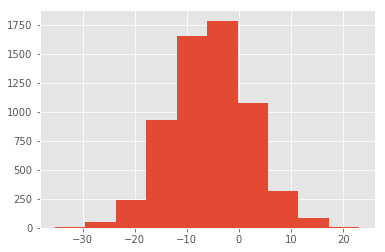

In [11]:
# histograma de diferencias Hr
data['diffHr'].hist()

In [22]:
# comportamiento de los datos por mes
data.groupby(['Month']).mean()[['Hr','HrWRF']]

,Hr,HrWRF
Month,,
1.0,41.450787,44.815389
2.0,36.156996,41.821895
3.0,37.344165,45.491191
4.0,27.901539,33.474755
5.0,29.969440,35.266573
6.0,47.800255,53.295624


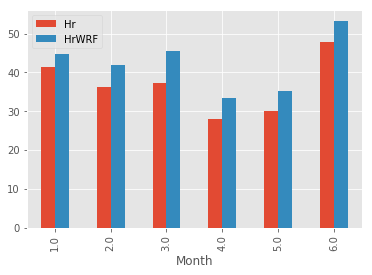

In [21]:
# visualizar los datos en grafica
data.groupby(['Month']).mean()[['Hr','HrWRF']].plot.bar()

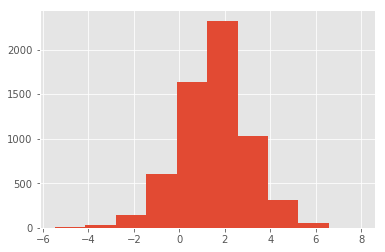

In [12]:
# histograma de diferencias Tpro
data['diffTpro'].hist()

In [23]:
# comportamiento de los datos por mes
data.groupby(['Month']).mean()[['Tpro','TproWRF']]

,Tpro,TproWRF
Month,,
1.0,13.485769,12.241899
2.0,15.096891,13.478516
3.0,17.353890,15.635514
4.0,19.495078,17.539529
5.0,22.461708,20.859032
6.0,22.240676,21.143828


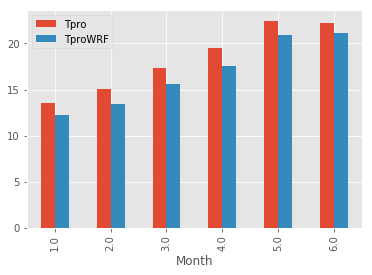

In [20]:
# visualizar los datos en grafica
data.groupby(['Month']).mean()[['Tpro','TproWRF']].plot.bar()

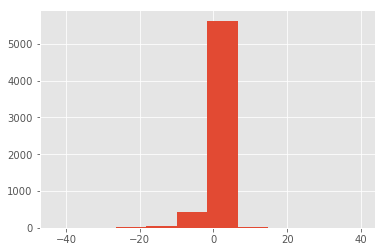

In [15]:
# histograma de diferencias Rain
data['diffRain'].hist()

In [19]:
# comportamiento de los datos por mes
data.groupby(['Month']).mean()[['Rain','RainWRF']]

,Rain,RainWRF
Month,,
1.0,0.014991,0.029041
2.0,0.081513,0.195703
3.0,0.292979,0.644869
4.0,0.031078,0.094193
5.0,0.126376,0.709989
6.0,1.480784,3.068844


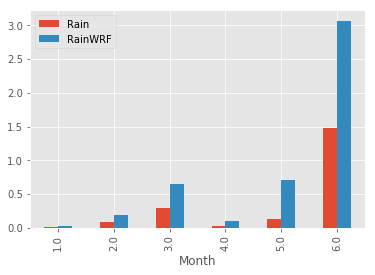

In [18]:
# visualizar los datos en grafica
data.groupby(['Month']).mean()[['Rain','RainWRF']].plot.bar()

## Regresion Lineal

In [25]:
# librerias seabron as sns
import seaborn as sns

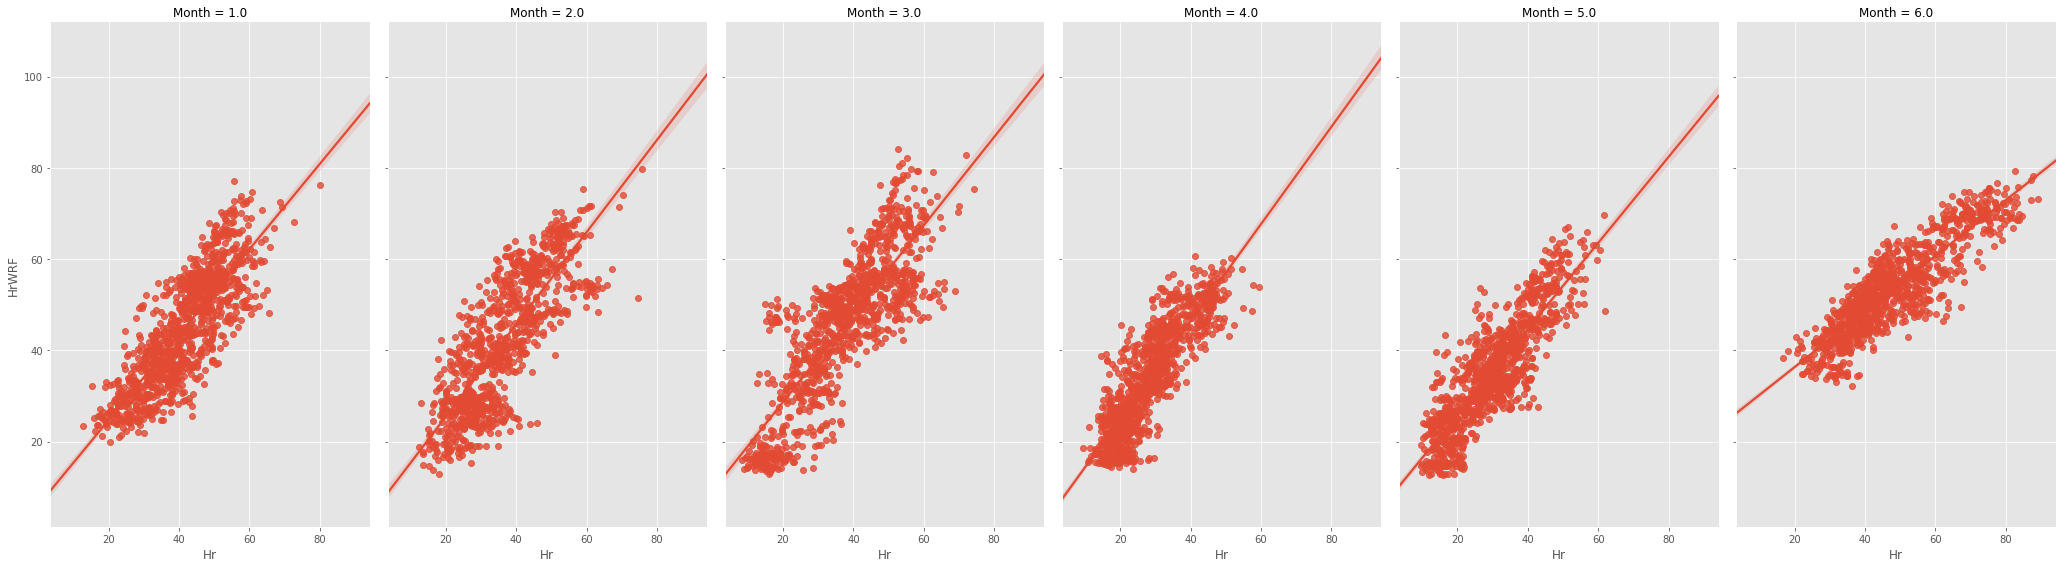

In [36]:
# Hr
sns.lmplot(x='Hr',y='HrWRF',data=data, col='Month', aspect=0.6, size=8)

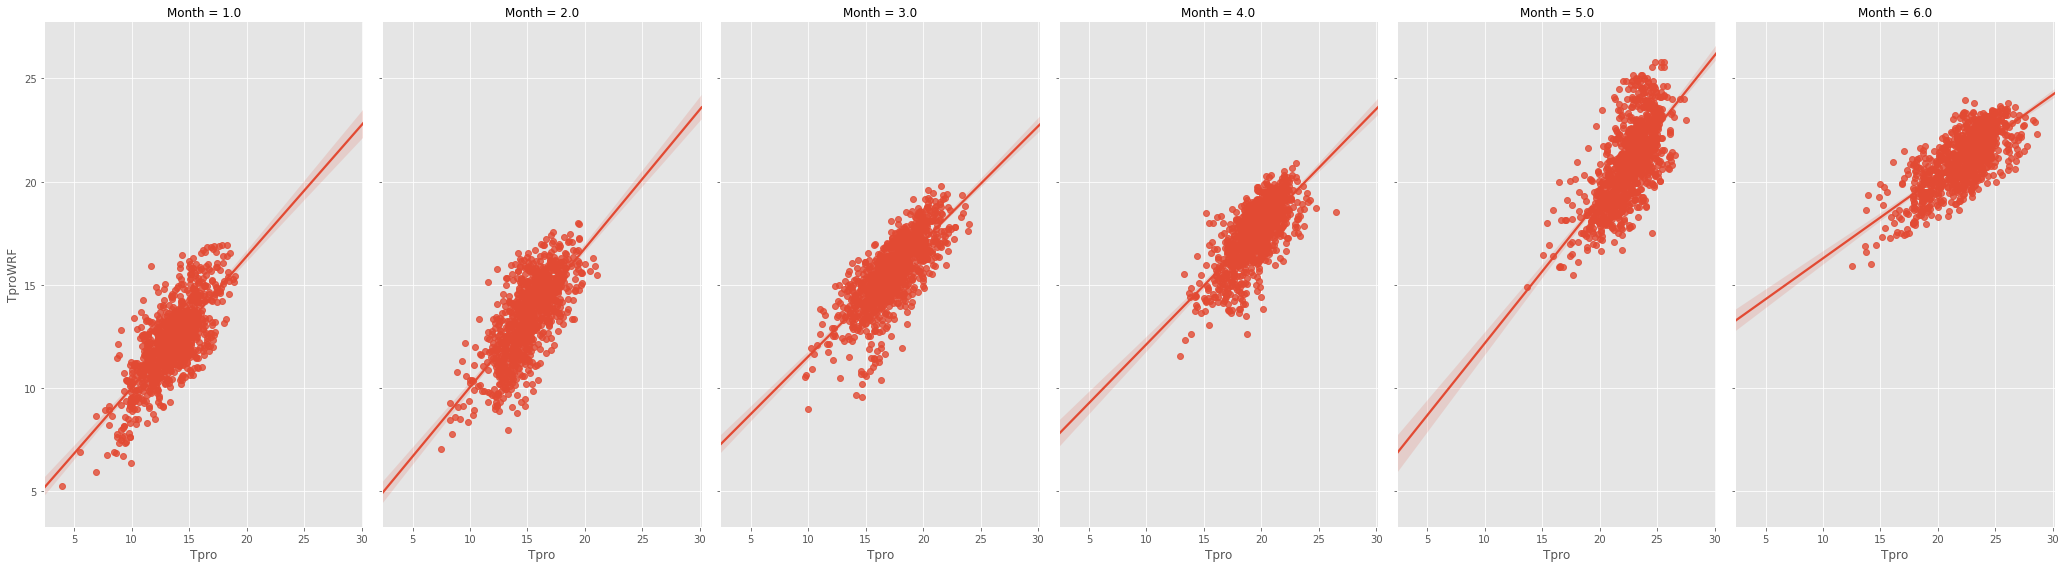

In [31]:
# Tpro
sns.lmplot(x='Tpro',y='TproWRF',data=data, col='Month', aspect=0.6, size=8)

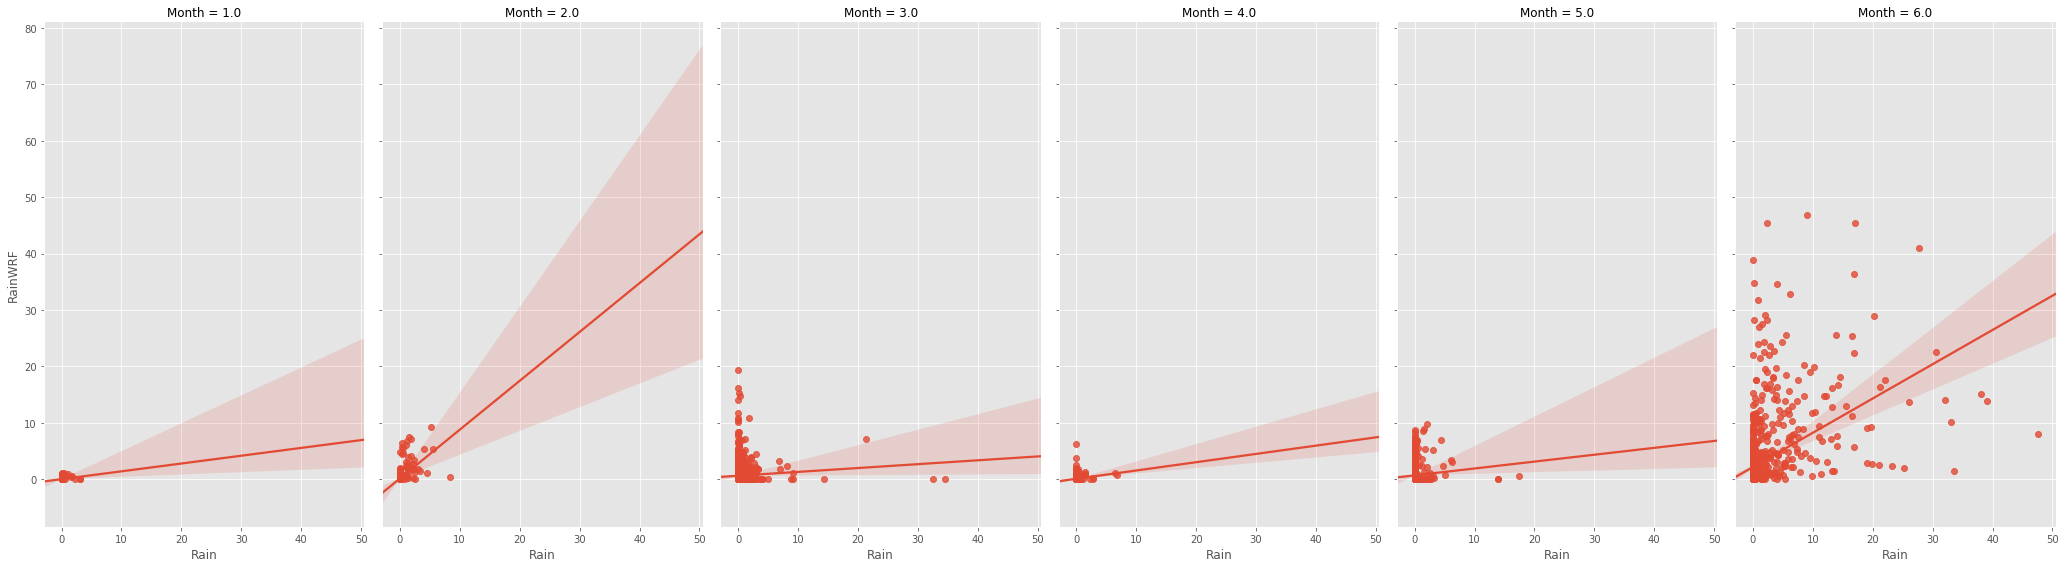

In [32]:
# Rain
sns.lmplot(x='Rain',y='RainWRF',data=data, col='Month', aspect=0.6, size=8)

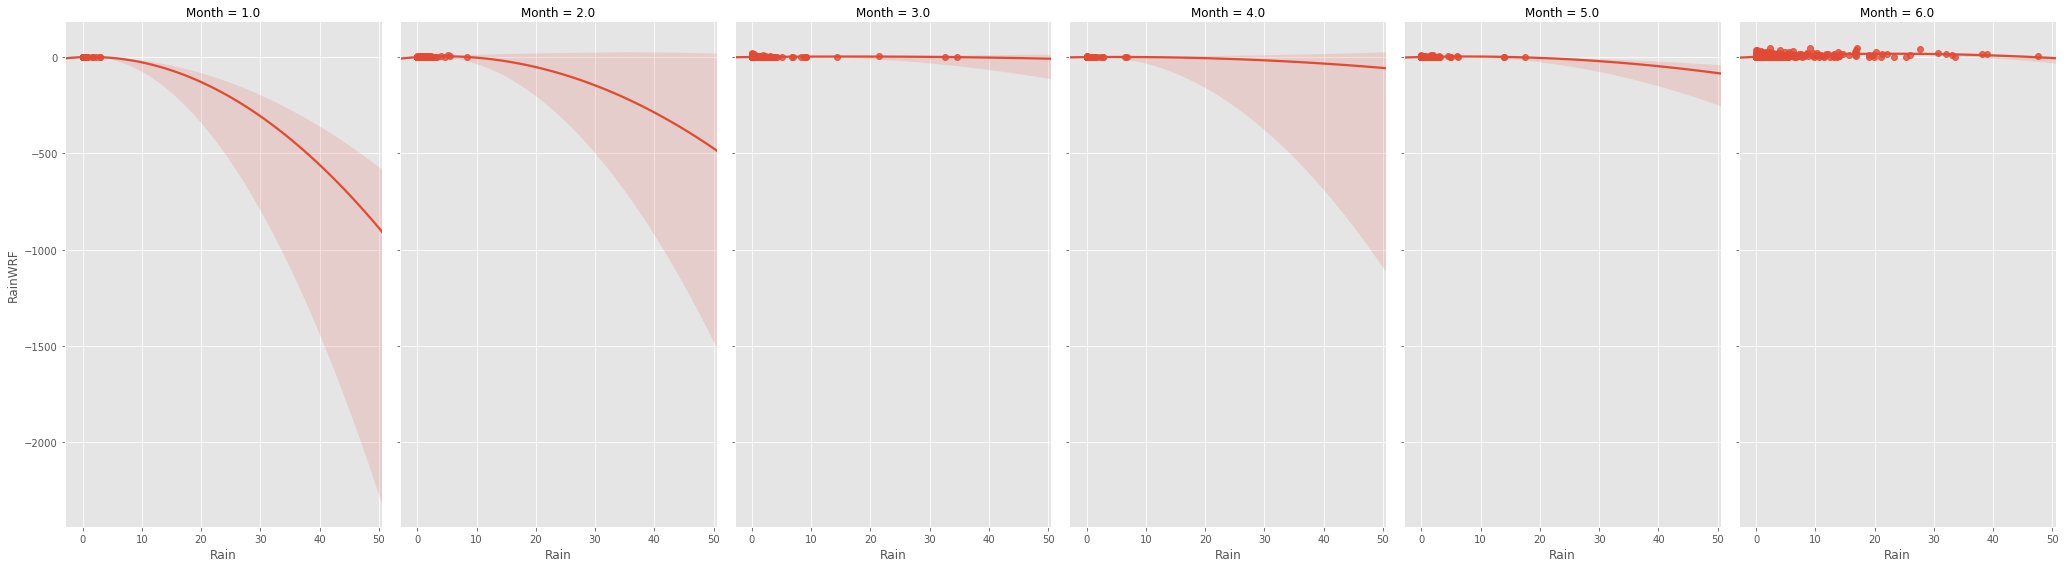

In [37]:
# Rain polynomial regression
sns.lmplot(x='Rain',y='RainWRF',data=data, col='Month', aspect=0.6, size=8, order=2)

## Regresion lineal con p y pearsonr

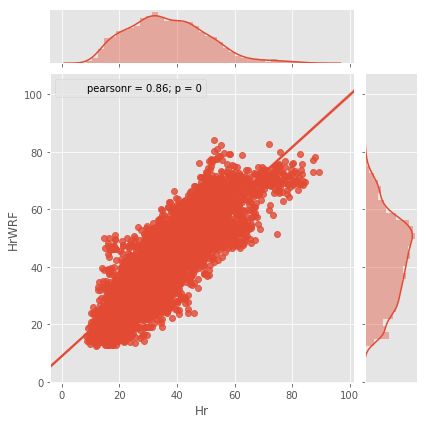

In [42]:
# Hr
sns.jointplot("Hr", "HrWRF", data=data, kind="reg")

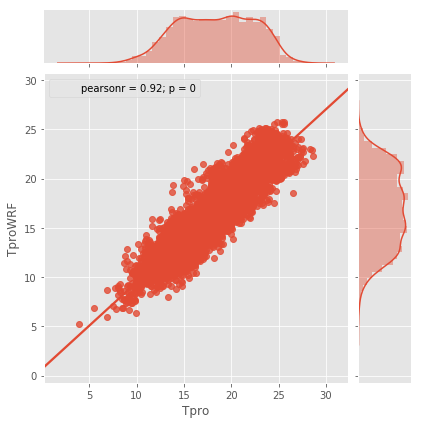

In [38]:
# Tpro
sns.jointplot("Tpro", "TproWRF", data=data, kind="reg")

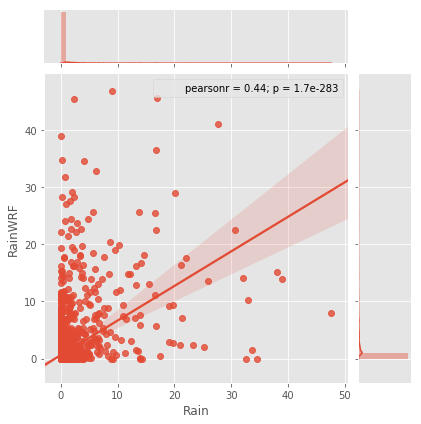

In [39]:
# Rain
sns.jointplot("Rain", "RainWRF", data=data, kind="reg")

## OLS Regression

In [44]:
# HR
result = sm.ols(formula='HrWRF ~ Hr', data=data).fit()

In [47]:
print(result.params)

Intercept    8.961574
Hr           0.908297
dtype: float64


In [48]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  HrWRF   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                 1.706e+04
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        10:39:45   Log-Likelihood:                -21078.
No. Observations:                6154   AIC:                         4.216e+04
Df Residuals:                    6152   BIC:                         4.217e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9616      0.273     32.862      0.0

In [52]:
# Tpro
result = sm.ols(formula='TproWRF ~ Tpro', data=data).fit()

In [53]:
print(result.params)

Intercept    0.677357
Tpro         0.879475
dtype: float64


In [54]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                TproWRF   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 3.634e+04
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        10:40:29   Log-Likelihood:                -10994.
No. Observations:                6154   AIC:                         2.199e+04
Df Residuals:                    6152   BIC:                         2.201e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6774      0.087      7.806      0.0

In [55]:
# Rain
result = sm.ols(formula='RainWRF ~ Rain', data=data).fit()

In [56]:
print(result.params)

Intercept    0.587440
Rain         0.604637
dtype: float64


In [57]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                RainWRF   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1441.
Date:                Tue, 24 Oct 2017   Prob (F-statistic):          1.75e-283
Time:                        10:40:55   Log-Likelihood:                -14737.
No. Observations:                6154   AIC:                         2.948e+04
Df Residuals:                    6152   BIC:                         2.949e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5874      0.034     17.152      0.0

## Histogramas seaborn

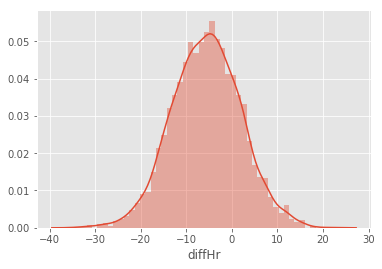

In [59]:
# Hr
sns.distplot(data['diffHr'])

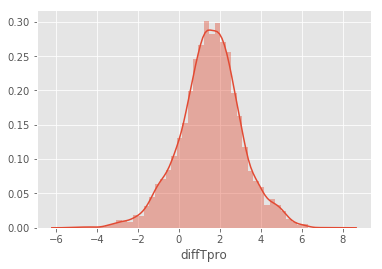

In [64]:
# Tpro
sns.distplot(data['diffTpro'])

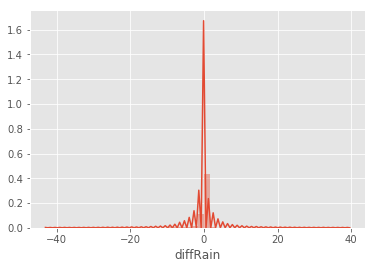

In [65]:
# Rain
sns.distplot(data['diffRain'])